# Programming Assignment \# 1

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [5]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

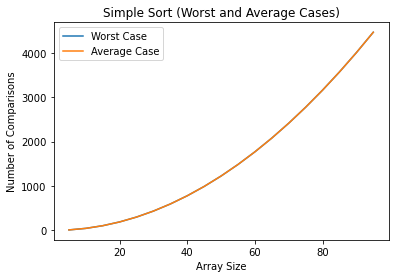

In [6]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----

### Bubble Sort

In [63]:
def bubble_sort(a):
    # Implement code to bubble sort the given array a in place.
    # Also return the number of comparisons. 
    num_compares = 0
    # ... blah blah blah .. 
    n = len(a)
    for i in range(n):
        for j in range(n-i-1):
            num_compares += 1
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
                
    return num_compares

### Complexity Analysis of Bubble Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __

Bubble Sort has 2 loops to compare adjacent 2 numbers. If 2 numbers are in wrong order the 2 numbers are swapped. Since inner and outer loops are implemented in any cases, Bubble sort has a worst-case and average complexity of $\Theta(n^2)$, where n is the number of items being sorted. 

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

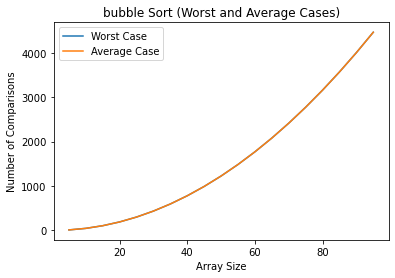

In [64]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
# Code for running sorting and generating number of compares
# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a



num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = bubble_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = bubble_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('bubble Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Merge Sort

In [54]:
def merge_sort(a):
    # Implement the code for merge sort
    # Use a function merge_sort_recursive to implement the recursive call
    # Be careful in counting number of comparisons since you should include comparisons in the merge part.
    # Also: code needs to sort the array a. You may have to copy things over from a temp array back into a.
    
    return merge_sort_recursive(a, 0, len(a)-1)



def merge_sort_recursive(arr, l, r):
    num_compares = 0
    if l < r:
        num_compares += 1
        m = (l+r)//2
 
        
        merge_sort_recursive(arr, l, m)
        merge_sort_recursive(arr, m+1, r)
        num_compares =+ merge(arr, l, m, r)
        
    return num_compares
    
def merge(arr, l, m, r):    
    n1 = m - l + 1
    n2 = r - m


    L = [0] * (n1)
    R = [0] * (n2)


    for i in range(0, n1):
        L[i] = arr[l + i]

    for j in range(0, n2):
        R[j] = arr[m + 1 + j]


    i = 0     
    j = 0     
    k = l  

    num_compares = 0

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
        num_compares += 3


    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
        num_compares += 1


    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
        num_compares += 1

    return num_compares
        
        
        
    

"""

def merge_sort_recursive(a, l, r):
    num_compares = 0
    if len(a) > 0:
        m = (l+r)//2
        
        left = a[:m]
        right = a[m:]
        
        leftHalf = merge_sort_recursive(a, l, m)
        rightHalf = merge_sort_recursive(a, m+1, r)
        num_compares += leftHalf[1] + rightHalf[1]
        
        i, j, k = 0, 0, 0
        
        n = len(leftHalf)
        m = len(rightHalf)

        while i < n and j < m:
            if leftHalf[i] <= rightHalf[j]:
                num_compares += 1
                a[k] = leftHalf[i]
                k += 1
                i += 1
            else:
                num_compares += 1
                a[k] = rightHalf[j]
                k += 1
                j += 1
            num_compares += 3

        while i < n:
            a[k] = leftHalf[i]
            i += 1
            k += 1
            num_compares += 1

        while j < m:
            a[k] = rightHalf[j]
            j += 1
            k += 1
            num_compares += 1
            
        return num_compares
        

       
"""        

    

    

        

 

   
    
    



'\n\ndef merge_sort_recursive(a, l, r):\n    num_compares = 0\n    if len(a) > 0:\n        m = (l+r)//2\n        \n        left = a[:m]\n        right = a[m:]\n        \n        leftHalf = merge_sort_recursive(a, l, m)\n        rightHalf = merge_sort_recursive(a, m+1, r)\n        num_compares += leftHalf[1] + rightHalf[1]\n        \n        i, j, k = 0, 0, 0\n        \n        n = len(leftHalf)\n        m = len(rightHalf)\n\n        while i < n and j < m:\n            if leftHalf[i] <= rightHalf[j]:\n                num_compares += 1\n                a[k] = leftHalf[i]\n                k += 1\n                i += 1\n            else:\n                num_compares += 1\n                a[k] = rightHalf[j]\n                k += 1\n                j += 1\n            num_compares += 3\n\n        while i < n:\n            a[k] = leftHalf[i]\n            i += 1\n            k += 1\n            num_compares += 1\n\n        while j < m:\n            a[k] = rightHalf[j]\n            j += 1\n 

### Complexity Analysis of Merge Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __

Merge sort doesn't get affected too much by order of elements in arrays as it will have to do exactly the same number of operations anyway: recursively divide into small arrays and then merge them back, in total $\Theta(nlogn)$ time.

How would you craft inputs for the worst case?

For some sorting algorithms (e.g. quicksort), the initial order of the elements can affect the number of operations to be done. However it doesn't make any change for mergesort as it will have to do exactly the same number of operations anyway: recursively divide into small arrays and then merge them back, in total Θ(nlogn) time.






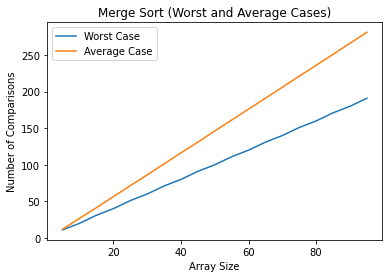

In [55]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a



num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = merge_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = merge_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Merge Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Quick Sort


In [48]:
def quick_sort(a):
    # Implement code for quick sort
    # Must sort the array a in place
    # Must return the number of comparisons
    num_compares = quicksort(a, a[0], a[len(a)-1])
                             
    return num_compares # you can implement it how you wish

def partition(mylist, start, end):
    count = 0
    pos = start
    for i in range(start, end):
        count += 1
        if mylist[i] < mylist[end]:
            mylist[i], mylist[pos] = mylist[pos], mylist[i]
            pos += 1
    mylist[pos], mylist[end] = mylist[end], mylist[pos]
    return pos, count

def quicksort(mylist, start, end):
    count = 0
    if start < end:
        pos, count = partition(mylist, start, end)        
        count += quicksort(mylist, start, pos - 1)
        count += quicksort(mylist, pos + 1, end)
    return count

"""
def quickSort(a, left, right):
    # Implement code for quick sort
    # Must sort the array a in place
    # Must return the number of comparisons
    num_compares = 0
    
    if len(a) < 1:
        return
    
    if left < right:
        num_compares, p = partition(a, left, right, num_compares)
        quickSort(a, left, p-1)
        quickSort(a, p+1, right)
    return num_compares 

def partition(a, left, right, num_compares):
    pivot = a[right]
    i = (left-1)
    
    for j in range(left, right):
        num_compares += 1
        if a[j] <= pivot:
            i = i + 1
            a[i], a[j] = a[j], a[i]
            
    a[i+1], a[right] = a[right], a[i+1]
    
    return num_compares, i+1   
"""

'\ndef quickSort(a, left, right):\n    # Implement code for quick sort\n    # Must sort the array a in place\n    # Must return the number of comparisons\n    num_compares = 0\n    \n    if len(a) < 1:\n        return\n    \n    if left < right:\n        num_compares, p = partition(a, left, right, num_compares)\n        quickSort(a, left, p-1)\n        quickSort(a, p+1, right)\n    return num_compares # you can implement it how you wish\n\ndef partition(a, left, right, num_compares):\n    pivot = a[right]\n    i = (left-1)\n    \n    for j in range(left, right):\n        num_compares += 1\n        if a[j] <= pivot:\n            i = i + 1\n            a[i], a[j] = a[j], a[i]\n            \n    a[i+1], a[right] = a[right], a[i+1]\n    \n    return num_compares, i+1   \n'

### Complexity Analysis of Quick Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __

The worst case time complexity of a typical implementation of QuickSort is $O(n^2)$. The worst case occurs when the picked pivot is always an extreme (smallest or largest) element. This happens when input array is sorted or reverse sorted and either first or last element is picked as pivot. The average case run time of quick sort is $\Theta(n \log n)$ . This case happens when we dont exactly get evenly balanced partitions. We might get at worst a 3-to-1 split on either side of pivot element. 

How would you craft inputs for the worst case?

If picking the leftmost or rightmost element in an array as a pivot then I would create an array that is already sorted in ascending or discending order. If randomly picking an element as a pivot in an array, I would create an array that has same elements.

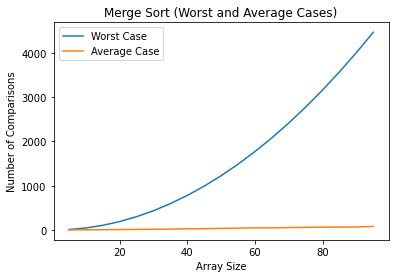

In [50]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a



num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = quick_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = quick_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Merge Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

-----
## Testing Code: Do not edit



In [ ]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [ ]:
test_sorting_algorithm(simple_sort, 50, 100)

In [11]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [52]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [42]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
